## **Prediction using Supervised ML**
In this Jupyter notebook we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.
Percentage prediction of student basedon number of hours of study using Simple Linear Regression.

In [54]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  
%matplotlib inline

Getting data from the url and saving it in Pandas Dataframe.

In [52]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [53]:
# Displaying top 6 rows of our data
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Getting the descriptive statistics of the data

In [49]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [50]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

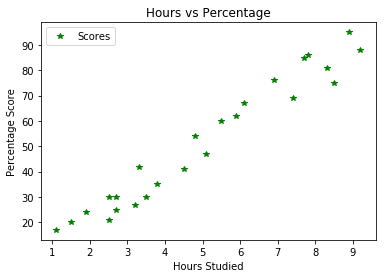

In [9]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*', color = 'green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [58]:
# using corr function to find the correlation between X and Y
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (predictors) and "labels" (outputs).

In [11]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [73]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

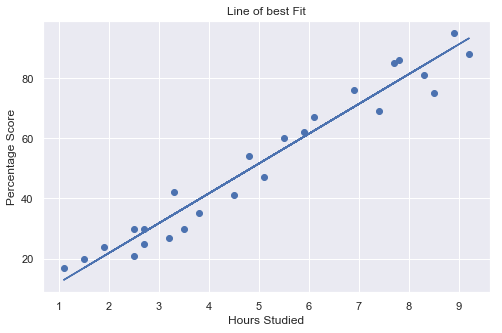

In [59]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Line of best Fit')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

 Comparing Actual Values vs Predicted Values

In [61]:
predicted_df = pd.DataFrame({'Hours Studied': X_test.reshape(-1,), 'Predicted percentage score': y_pred, 'Actual percentage score': y_test})
predicted_df

,Hours Studied,Predicted percentage score,Actual percentage score
0,1.5,16.884145,20
1,3.2,33.732261,27
2,7.4,75.357018,69
3,2.5,26.794801,30
4,5.9,60.491033,62


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.In this we will use Mean Absolute Error, which gives us the absolute value of the difference between original y values and predicted y values.

MODEL PERFORMANCE

In [72]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 4.18385989900298
Root Mean Squared Error: 2.0454485813637504
Mean Squared Error: 21.598769307217413


 What will be predicted score if a student studies for 9.25 hrs/ day? 

In [63]:
# Now we put the predictor into our Linear Regression model to get the predicted output 
own_pred = regressor.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
